Import useful libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

%load_ext autoreload
%autoreload 2

# Block spin analysis

In [3]:
from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

In [4]:
x = Dataset(64, 64)
x.add_data("./data/test/" , ["langevin", "averageEpsilon"], 1)
print(x.m_q_phys)

0.3115123408336976 0.1673411387445473 961.9275425582281 248.74932143618645
[(0, 0)]


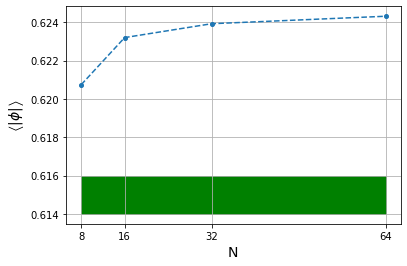

In [5]:
plt.plot([8, 16, 32, 64], [0.620737, 0.623195, 0.623918, 0.624308], 'o--', markersize=4)
plt.fill([8, 8, 64, 64], [0.614, 0.616, 0.616, 0.614], color="green", label="HMC + pseudof. Timoteo")
plt.grid()
plt.xlabel("N", fontsize=14)
plt.ylabel(r"$\left\langle|\phi|\right\rangle$", fontsize=14)
ax = plt.gca()
ax.set_xticks([8, 16, 32, 64])
#ax.set_xticklabels(["8", "16", "32", "64"])


In [6]:
dataset1 = Dataset(16, 16)
for i in range(1, 6):
    dataset1.add_data("../conf" + str(i) + "/", ["langevin", "averageEpsilon"], 1)

ValueError: cannot reshape array of size 193500 into shape (16)

# Magnetisation

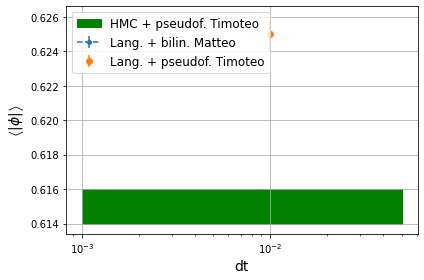

In [7]:
plt.errorbar(dataset1.parameters, [v[0] for v in dataset1.phi], [v[1] for v in dataset1.phi], fmt='o--', markersize=4, label="Lang. + bilin. Matteo")
plt.errorbar([0.01], [0.625], [1e-3], fmt='o', label="Lang. + pseudof. Timoteo")
plt.grid()
plt.xscale('log')
plt.xlabel("dt", fontsize=14)
plt.ylabel(r"$\left\langle|\phi|\right\rangle$", fontsize=14)
plt.fill([1e-3, 1e-3, 5e-2, 5e-2], [0.614, 0.616, 0.616, 0.614], color="green", label="HMC + pseudof. Timoteo")
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("timo.pdf")

In [9]:
dataset1 = Dataset(64, 64)
dataset1.add_data("./data/confss/", ["langevin", "averageEpsilon"], 1)

0.6360299166666669 9.093731957421364e-05 0.5080039710581976 0.04543721119535997


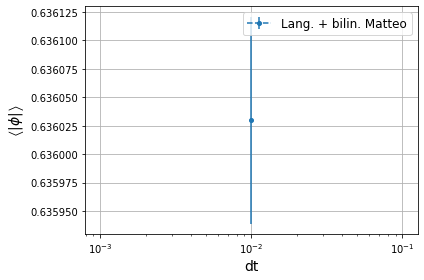

In [11]:
plt.errorbar(dataset1.parameters, [v[0] for v in dataset1.phi], [v[1] for v in dataset1.phi], fmt='o--', markersize=4, label="Lang. + bilin. Matteo")
plt.grid()
plt.xscale('log')
plt.xlabel("dt", fontsize=14)
plt.ylabel(r"$\left\langle|\phi|\right\rangle$", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

# Susceptibility

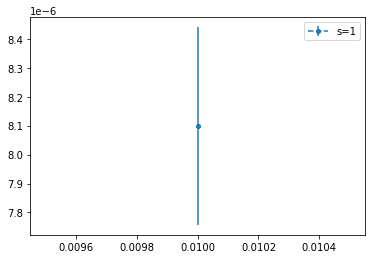

In [12]:
plt.errorbar(dataset1.parameters, [v[0] for v in dataset1.chi2], [v[1] for v in dataset1.chi2], fmt='o--', markersize=4, label='s=1')
plt.legend()
plt.show()

# Condensate

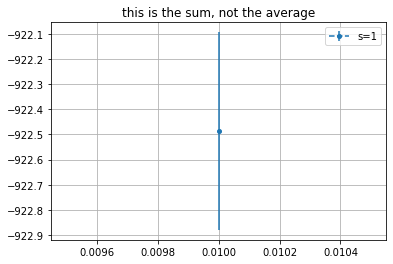

In [13]:
plt.errorbar(dataset1.parameters, [dataset1.Nx*dataset1.Nx*v[0] for v in dataset1.condensate], [dataset1.Nx*dataset1.Nx*v[1] for v in dataset1.condensate], fmt='o--', markersize=4, label='s=1')
plt.grid()
plt.legend()
plt.title("this is the sum, not the average")
plt.show()

# Physical quark mass

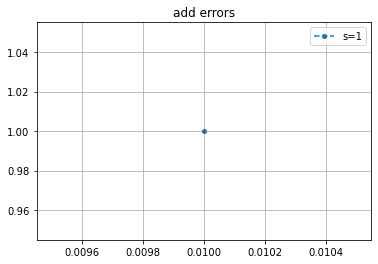

In [16]:
plt.plot(dataset1.parameters, [v[0] for v in dataset1.m_q_phys], 'o--', markersize=4, label='s=1')
plt.grid()
plt.legend()
plt.title("add errors")
plt.show()

# Renormalised boson mass

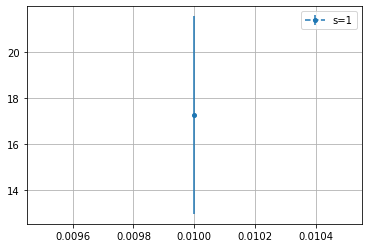

In [18]:
plt.errorbar(dataset1.parameters, [dataset1.Nx*v[0] for v in dataset1.m_phi_r], [dataset1.Nx*v[1] for v in dataset1.m_phi_r], fmt='o--', markersize=4, label='s=1')
plt.grid()
plt.legend()
plt.show()